<a href="https://colab.research.google.com/github/KSaxena01/DiabetesPrediction/blob/main/diabetesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement :** Analysis of Different Classification Models for Diabetes Prediction and Finding the Best Model

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
diabetes=pd.read_csv('drive/MyDrive/DiabetesPrediction/diabetesProcessed.csv')

In [9]:
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,69,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [10]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Correlation Matrix

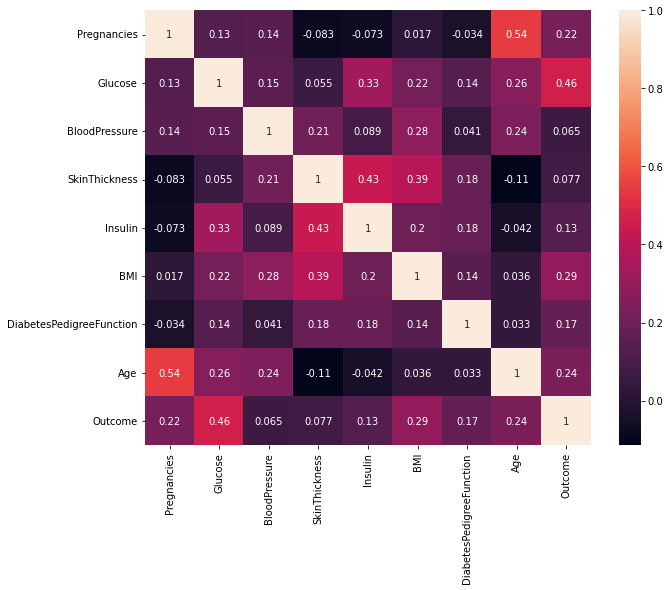

In [11]:
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(diabetes.corr(), annot=True, ax=ax)

## Affect of Each Attribute on Outcome

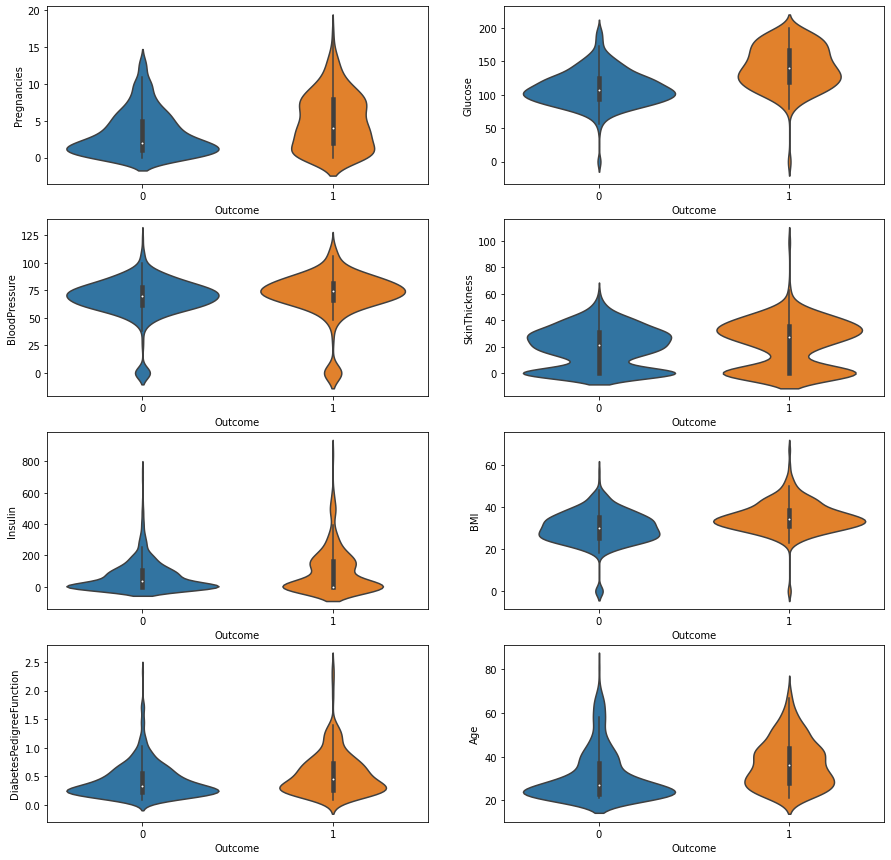

In [12]:
f, axes = plt.subplots(4,2, figsize=(15,15))
sns.violinplot(x=diabetes.Outcome ,y=diabetes.Pregnancies, ax=axes[0,0])
sns.violinplot(x=diabetes.Outcome ,y=diabetes.Glucose, ax=axes[0,1])
sns.violinplot(x=diabetes.Outcome ,y=diabetes.BloodPressure, ax=axes[1,0])
sns.violinplot(x=diabetes.Outcome ,y=diabetes.SkinThickness, ax=axes[1,1])
sns.violinplot(x=diabetes.Outcome ,y=diabetes.Insulin, ax=axes[2,0])
sns.violinplot(x=diabetes.Outcome ,y=diabetes.BMI, ax=axes[2,1])
sns.violinplot(x=diabetes.Outcome ,y=diabetes.DiabetesPedigreeFunction, ax=axes[3,0])
sns.violinplot(x=diabetes.Outcome ,y=diabetes.Age, ax=axes[3,1])

## Most Common Ages of People Tested

<BarContainer object of 52 artists>

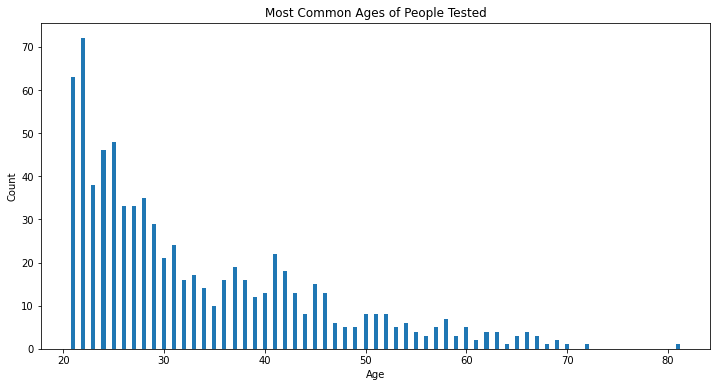

In [13]:
top_age = diabetes.Age.value_counts()
plt.figure(figsize=(12,6))
plt.title('Most Common Ages of People Tested')
plt.xlabel('Age')
plt.ylabel('Count')
plt.bar(top_age.index,top_age, width = 0.4)

## Most Common Blood Pressure of People Tested

(array([  0.,   1.,   3.,  12.,  70., 200., 243., 145.,  44.,  11.,   4.,
          1.,   0.]),
 array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
        140]),
 <a list of 13 Patch objects>)

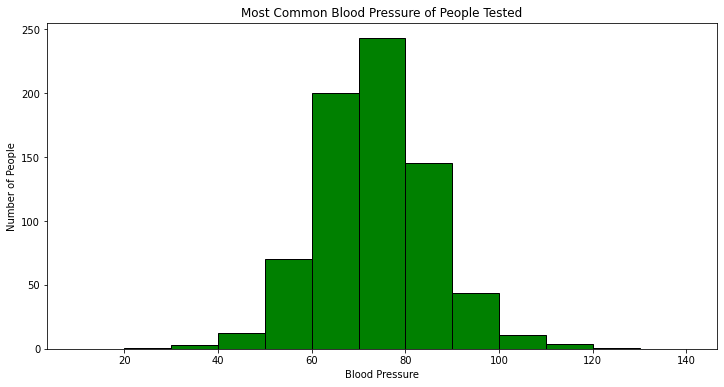

In [14]:
bp = diabetes.BloodPressure
plt.figure(figsize=(12,6))
plt.title('Most Common Blood Pressure of People Tested')
plt.xlabel('Blood Pressure')
plt.ylabel('Number of People')
plt.hist(bp, bins=np.arange(10,150,10), color='green', edgecolor = 'black')

## Most Common Glucose of People Tested

(array([  5.,   0.,   0.,   0.,   1.,   3.,   7.,  25.,  63.,  94., 117.,
         93., 103.,  61.,  54.,  41.,  31.,  25.,  28.,  18.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200]),
 <a list of 20 Patch objects>)

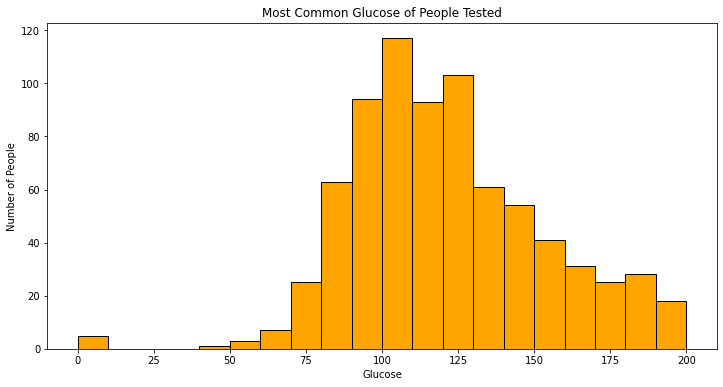

In [15]:
glucose = diabetes.Glucose
plt.figure(figsize=(12,6))
plt.title('Most Common Glucose of People Tested')
plt.xlabel('Glucose')
plt.ylabel('Number of People')
plt.hist(glucose, bins=np.arange(0,210,10), color='orange', edgecolor = 'black')

## Most Common BMI of People Tested

(array([ 11.,   0.,   0.,  13.,  93., 179., 224., 151.,  62.,  27.,   5.,
          3.,   0.]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]),
 <a list of 13 Patch objects>)

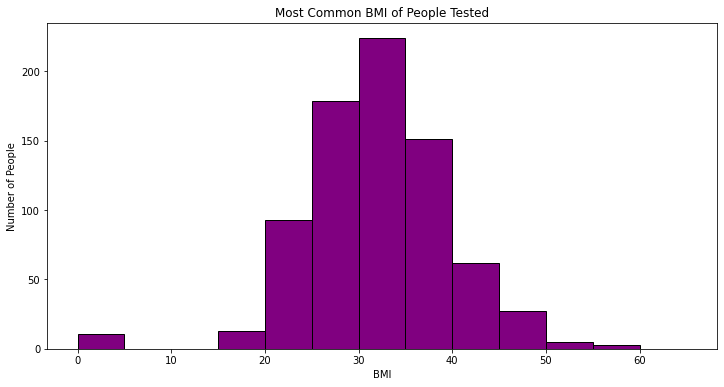

In [16]:
bmi = diabetes.BMI
plt.figure(figsize=(12,6))
plt.title('Most Common BMI of People Tested')
plt.xlabel('BMI')
plt.ylabel('Number of People')
plt.hist(bmi, bins=np.arange(0,70,5), color='purple', edgecolor = 'black')

## Percentage of People Tested Positive For Diabetes

([<matplotlib.patches.Wedge at 0x7f6232d40290>,
 [Text(0.49999007131962026, -0.979800963758355, 'negative'),
  Text(-0.49999007131962103, 0.9798009637583547, 'positive')],
 [Text(0.2727218570834292, -0.534436889322739, '65.02%'),
  Text(-0.2727218570834296, 0.5344368893227388, '34.98%')])

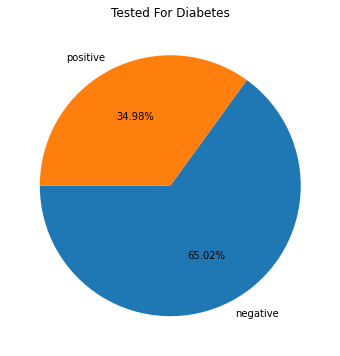

In [17]:
outcome_counts = diabetes.Outcome.value_counts()
plt.figure(figsize=(12,6))
plt.title('Tested For Diabetes')
plt.pie(outcome_counts, labels=['negative', 'positive'], autopct='%1.2f%%', startangle=180)

## Getting 70% Data as Training Data and 30% Data as Testing Data

In [18]:
xtrain = pd.read_csv('drive/MyDrive/DiabetesPrediction/Xtraining.csv')
ytrain = pd.read_csv('drive/MyDrive/DiabetesPrediction/Ytraining.csv')
xtest = pd.read_csv('drive/MyDrive/DiabetesPrediction/Xtesting.csv')
ytest = pd.read_csv('drive/MyDrive/DiabetesPrediction/Ytesting.csv')

## Logistic Regression Classifier

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [20]:
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [21]:
logregPredict = logreg.predict(xtest)
logregPredict

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [22]:
print("Accuracy:",metrics.accuracy_score(ytest, logregPredict))
print("Precision:",metrics.precision_score(ytest, logregPredict))
print("Recall:",metrics.recall_score(ytest, logregPredict))
logregF1 = metrics.f1_score(ytest, logregPredict)
print("F1 Score:", logregF1)

Accuracy: 0.7965367965367965
Precision: 0.7796610169491526
Recall: 0.575
F1 Score: 0.6618705035971223


Text(0.5, 15.0, 'Predicted Outcome')

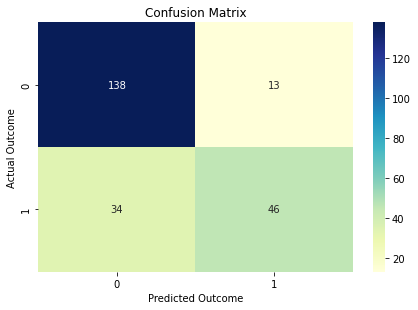

In [23]:
cnf_matrix = metrics.confusion_matrix(ytest, logregPredict)
cnf_matrix
class_names=[0,1]
fig = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual Outcome')
plt.xlabel('Predicted Outcome')

## KNN Classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

### Selecting best value of K for KNN Classifier

In [25]:
kScores = {}
for k in range(1, 30):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(xtrain, ytrain)
  knnPredict = knn.predict(xtest)
  kScores[k] = metrics.f1_score(ytest, knnPredict)
maxVal = 0
maxKey = 0
for key, value in kScores.items() :
  if maxVal < value :
    maxVal = value
    maxKey = key
K = maxKey
K

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

11

In [26]:
knn=KNeighborsClassifier(n_neighbors=K)
knn.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=11)

In [27]:
knnPredict = knn.predict(xtest)
knnPredict

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [28]:
print("Accuracy:",metrics.accuracy_score(ytest, knnPredict))
print("Precision:",metrics.precision_score(ytest, knnPredict))
print("Recall:",metrics.recall_score(ytest, knnPredict))
knnF1 = metrics.f1_score(ytest, knnPredict)
print("F1 Score:", knnF1)

Accuracy: 0.7532467532467533
Precision: 0.676923076923077
Recall: 0.55
F1 Score: 0.6068965517241379


Text(0.5, 15.0, 'Predicted Outcome')

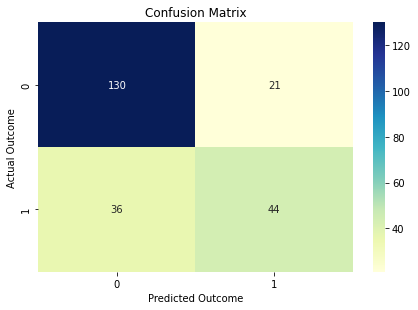

In [29]:
cnf_matrix = metrics.confusion_matrix(ytest, knnPredict)
cnf_matrix
class_names=[0,1]
fig = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual Outcome')
plt.xlabel('Predicted Outcome')

## Naive Bayes Classifier

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
naiveBayes = GaussianNB()
naiveBayes.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [32]:
nbPredict = naiveBayes.predict(xtest)
nbPredict

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [33]:
print("Accuracy:",metrics.accuracy_score(ytest, nbPredict))
print("Precision:",metrics.precision_score(ytest, nbPredict))
print("Recall:",metrics.recall_score(ytest, nbPredict))
nbF1 = metrics.f1_score(ytest, nbPredict)
print("F1 Score:", nbF1)

Accuracy: 0.7575757575757576
Precision: 0.6818181818181818
Recall: 0.5625
F1 Score: 0.6164383561643836


Text(0.5, 15.0, 'Predicted Outcome')

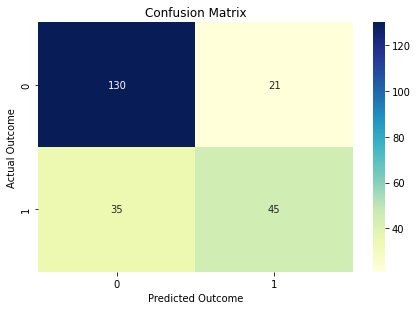

In [34]:
cnf_matrix = metrics.confusion_matrix(ytest, nbPredict)
cnf_matrix
class_names=[0,1]
fig = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual Outcome')
plt.xlabel('Predicted Outcome')

## Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
decisionTree = DecisionTreeClassifier()
decisionTree.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [37]:
dtPredict = decisionTree.predict(xtest)
dtPredict

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [38]:
print("Accuracy:",metrics.accuracy_score(ytest, dtPredict))
print("Precision:",metrics.precision_score(ytest, dtPredict))
print("Recall:",metrics.recall_score(ytest, dtPredict))
dtF1 = metrics.f1_score(ytest, dtPredict)
print("F1 Score:", dtF1)

Accuracy: 0.6536796536796536
Precision: 0.5
Recall: 0.5625
F1 Score: 0.5294117647058824


Text(0.5, 15.0, 'Predicted Outcome')

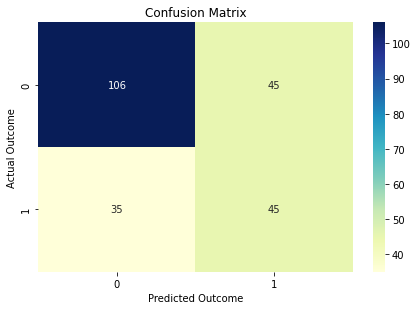

In [39]:
cnf_matrix = metrics.confusion_matrix(ytest, dtPredict)
cnf_matrix
class_names=[0,1]
fig = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual Outcome')
plt.xlabel('Predicted Outcome')

## Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
randomForest = RandomForestClassifier(n_estimators=100)
randomForest.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier()

In [42]:
rfPredict = randomForest.predict(xtest)
rfPredict

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [43]:
print("Accuracy:",metrics.accuracy_score(ytest, rfPredict))
print("Precision:",metrics.precision_score(ytest, rfPredict))
print("Recall:",metrics.recall_score(ytest, rfPredict))
rfF1 = metrics.f1_score(ytest, rfPredict)
print("F1 Score:", rfF1)

Accuracy: 0.7316017316017316
Precision: 0.640625
Recall: 0.5125
F1 Score: 0.5694444444444444


Text(0.5, 15.0, 'Predicted Outcome')

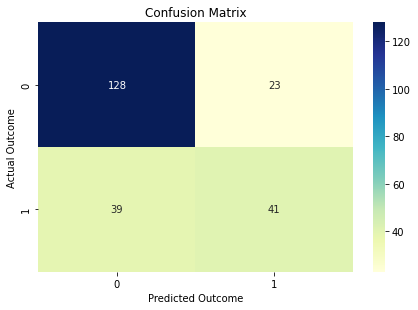

In [44]:
cnf_matrix = metrics.confusion_matrix(ytest, rfPredict)
cnf_matrix
class_names=[0,1]
fig = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual Outcome')
plt.xlabel('Predicted Outcome')

## SVM Classifier

In [45]:
from sklearn.svm import SVC

In [46]:
sv = SVC(probability=True)
sv.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(probability=True)

In [47]:
svPredict = sv.predict(xtest)
svPredict

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [48]:
print("Accuracy:",metrics.accuracy_score(ytest, svPredict))
print("Precision:",metrics.precision_score(ytest, svPredict))
print("Recall:",metrics.recall_score(ytest, svPredict))
svF1 = metrics.f1_score(ytest, svPredict)
print("F1 Score:", svF1)

Accuracy: 0.7402597402597403
Precision: 0.6851851851851852
Recall: 0.4625
F1 Score: 0.5522388059701493


Text(0.5, 15.0, 'Predicted Outcome')

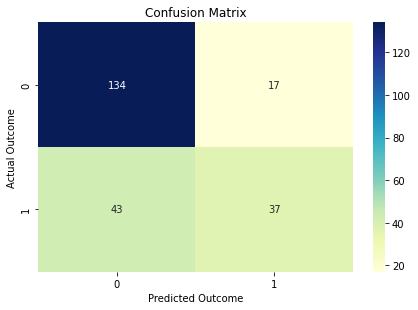

In [49]:
cnf_matrix = metrics.confusion_matrix(ytest, svPredict)
cnf_matrix
class_names=[0,1]
fig = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual Outcome')
plt.xlabel('Predicted Outcome')

## Comparing the ML Classification Models

In [85]:
if logregF1 >= knnF1 and logregF1 >= nbF1 and logregF1 >= dtF1 and logregF1 >= rfF1 and logregF1 >= svF1:
  model = LogisticRegression()
elif knnF1 >= nbF1 and knnF1 >= dtF1 and knnF1 >= rfF1 and knnF1 >= svF1:
  model = KNeighborsClassifier(n_neighbors=K)
elif nbF1 >= dtF1 and nbF1 >= rfF1 and nbF1 >= svF1 :
  model = GaussianNB()
elif dtF1 >= rfF1 and dtF1 >= svF1 :
  model = DecisionTreeClassifier()
elif rfF1 >= svF1 :
  model = RandomForestClassifier(n_estimators=100)
else :
  model = SVC(probability=True)

## Training the Best Model with the whole Data

In [51]:
XfinalTrain = pd.read_csv('drive/MyDrive/DiabetesPrediction/XdiabetesProcessed.csv')
YfinalTrain = pd.read_csv('drive/MyDrive/DiabetesPrediction/YdiabetesProcessed.csv')
XfinalTest = pd.read_csv('drive/MyDrive/DiabetesPrediction/XtestFinal.csv')
YfinalTest = pd.read_csv('drive/MyDrive/DiabetesPrediction/YtestFinal.csv')

In [52]:
model.fit(XfinalTrain, YfinalTrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [53]:
modelPredict = model.predict(XfinalTest)
modelPredict

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0])

In [54]:
print("Accuracy:",metrics.accuracy_score(YfinalTest, modelPredict))
print("Precision:",metrics.precision_score(YfinalTest, modelPredict))
print("Recall:",metrics.recall_score(YfinalTest, modelPredict))
print("F1 Score:", metrics.f1_score(YfinalTest, modelPredict))

Accuracy: 0.8181818181818182
Precision: 0.9166666666666666
Recall: 0.6470588235294118
F1 Score: 0.7586206896551724


Text(0.5, 15.0, 'Predicted Outcome')

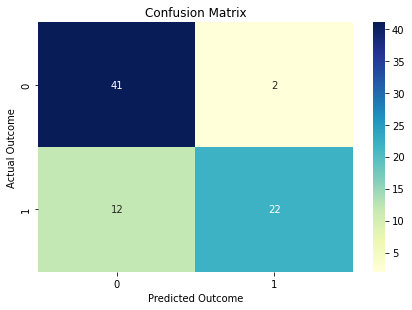

In [55]:
cnf_matrix = metrics.confusion_matrix(YfinalTest, modelPredict)
cnf_matrix
class_names=[0,1]
fig = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual Outcome')
plt.xlabel('Predicted Outcome')

## Neural Network

In [56]:
from sklearn.preprocessing import Normalizer
from keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split

In [57]:
X = diabetes.drop('Outcome', axis =1).values
y = diabetes.Outcome.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2)

In [58]:
def nn():
    inputs = Input(name='inputs', shape=[X_train.shape[1],])
    layer = Dense(128, name='FC1')(inputs)
    layer = BatchNormalization(name='BC1')(layer)
    layer = Activation('relu', name='Activation1')(layer)
    layer = Dropout(0.3, name='Dropout1')(layer)
    layer = Dense(128, name='FC2')(layer)
    layer = BatchNormalization(name='BC2')(layer)
    layer = Activation('relu', name='Activation2')(layer)
    layer = Dropout(0.3, name='Dropout2')(layer)
    layer = Dense(128, name='FC3')(layer)
    layer = BatchNormalization(name='BC3')(layer)
    layer = Dropout(0.3, name='Dropout3')(layer)
    layer = Dense(1, name='OutLayer')(layer)
    layer = Activation('sigmoid', name='sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

In [78]:
NNmodel = nn()
NNmodel.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 8)]               0         
                                                                 
 FC1 (Dense)                 (None, 128)               1152      
                                                                 
 BC1 (BatchNormalization)    (None, 128)               512       
                                                                 
 Activation1 (Activation)    (None, 128)               0         
                                                                 
 Dropout1 (Dropout)          (None, 128)               0         
                                                                 
 FC2 (Dense)                 (None, 128)               16512     
                                                                 
 BC2 (BatchNormalization)    (None, 128)               512 

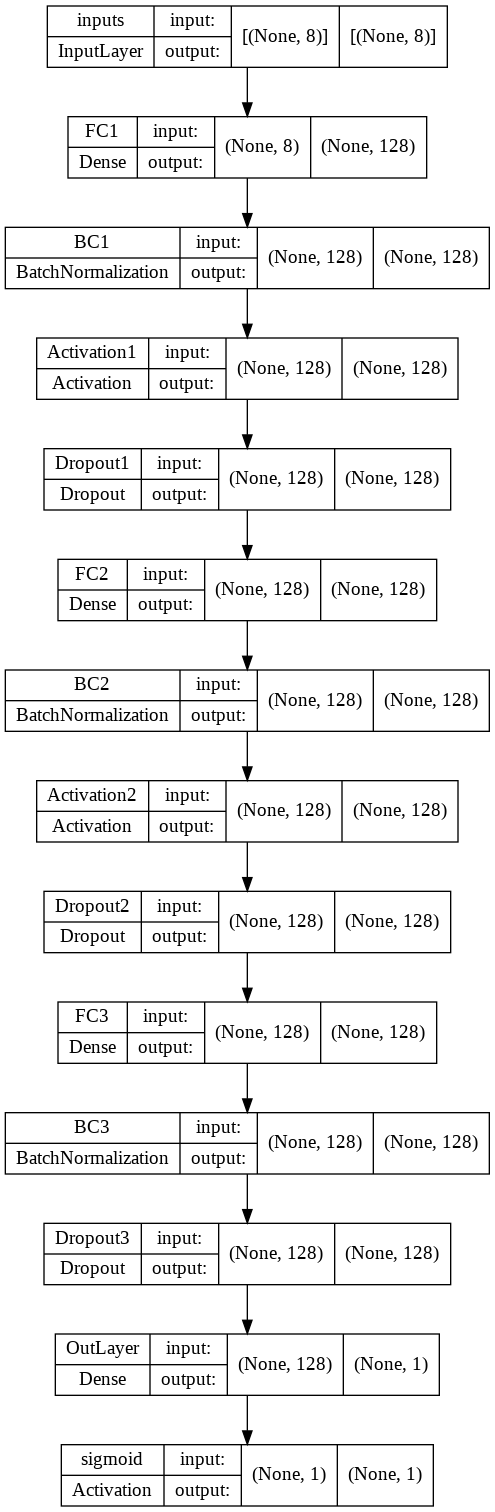

In [79]:
plot_model(NNmodel, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [80]:
NNmodel.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = NNmodel.fit(x=X_train, y=y_train, epochs=100, validation_data=(X_dev, y_dev), verbose=0)

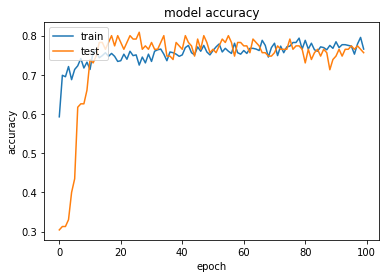

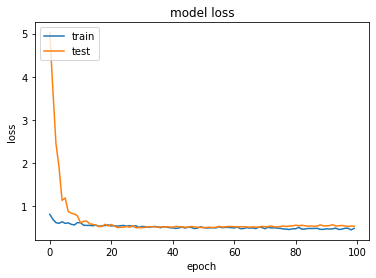

In [81]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [82]:
nnPredict = NNmodel.predict(X_test)
nnPredict = np.around(nnPredict)
nnPredict = np.asarray(nnPredict)
print("Accuracy:",metrics.accuracy_score(y_test, nnPredict))
print("Precision:",metrics.precision_score(y_test, nnPredict))
print("Recall:",metrics.recall_score(y_test, nnPredict))
nnF1 = metrics.f1_score(y_test, nnPredict)
print("F1 Score:", nnF1)

Accuracy: 0.75
Precision: 0.625
Recall: 0.42857142857142855
F1 Score: 0.5084745762711864


Text(0.5, 15.0, 'Predicted Outcome')

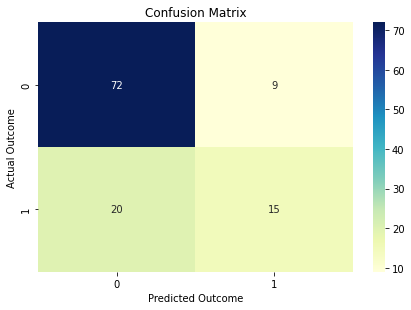

In [83]:
cnf_matrix = metrics.confusion_matrix(y_test, nnPredict)
cnf_matrix
class_names=[0,1]
fig = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual Outcome')
plt.xlabel('Predicted Outcome')

## Comparing Best ML Classification Model to the Neural Network

In [84]:
print("ML Model :")
print("\tClassification Report : ")
print(metrics.classification_report(YfinalTest, modelPredict))
print("Neural Network :")
print("\tClassification Report : ")
print(metrics.classification_report(y_test, nnPredict))

ML Model :
	Classification Report : 
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        43
           1       0.92      0.65      0.76        34

    accuracy                           0.82        77
   macro avg       0.85      0.80      0.81        77
weighted avg       0.84      0.82      0.81        77

Neural Network :
	Classification Report : 
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        81
           1       0.62      0.43      0.51        35

    accuracy                           0.75       116
   macro avg       0.70      0.66      0.67       116
weighted avg       0.74      0.75      0.73       116

